# States and fluxes VOM

In [1]:
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook
import matplotlib.dates as mdate

In [3]:
#soil moisture files

sm_files = ["../../data/DINGO_SWS/SWSCon_howard.txt",
            "../../data/DINGO_SWS/SWSCon_adelaide.txt",
            "../../data/DINGO_SWS/SWSCon_daly.txt",
            "../../data/DINGO_SWS/SWSCon_dry.txt",
            "../../data/DINGO_SWS/SWSCon_sturt.txt" ]

VOM_results = ["../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt",
               "../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt",
               "../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt",
               "../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt",
               "../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt" ]

VOM_2015 = "../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt"

VOM_soils = ["../../data/VOM_soils/HowardSprings/soilprofile.par",
               "../../data/VOM_soils/AdelaideRiver/soilprofile.par",
               "../../data/VOM_soils/DalyUncleared/soilprofile.par",
               "../../data/VOM_soils/DryRiver/soilprofile.par",
               "../../data/VOM_soils/SturtPlains/soilprofile.par" ]

In [4]:
#load soil moisture data
obs_sm = []
obs_theta = []
tobs_sm = []
for i in range(0, len(sm_files)):
    #values observations
    obs_sm.append((np.loadtxt(sm_files[i], usecols=2) ) )  #mm/d

    #date/times observations
    tobs_tmp = np.genfromtxt(sm_files[i],usecols=0, dtype=np.str )#mm/d
    tobs_sm.append(pd.date_range(tobs_tmp[0], tobs_tmp[-1], freq='D') )

In [5]:
#correct soil moisture data

#maximum values at Daly are too low, correct with observations (mail L.Hutley 21/5/2020)
thetas_corr = 0.354
obs_sm[3] = (obs_sm[3] - np.min(obs_sm[3])) /  (np.max(obs_sm[3]) - np.min(obs_sm[3])) * \
(thetas_corr-np.min(obs_sm[3])) + np.min(obs_sm[3])

#remove data of Sturt Plains after 2015, this was not corrected (mail J. Beringer 21/5/2020)
indend = np.where(tobs_sm[-1] == "01-01-2015")[0][0]
tobs_sm[-1] =tobs_sm[-1][0:indend]
obs_sm[-1]=obs_sm[-1][0:indend]

In [6]:
#load soil data
soildata = []
for i in range(0, len(VOM_soils)):
    #values observations
    soildata.append((np.loadtxt(VOM_soils[i]) ) ) 
    
cz2015 = 15
zr2015 = 10 
thetar2015 = 0.065
thetas2015 = 0.41
avg2015 = 7.5
nvg2015 = 1.89

In [7]:
#load model data
zw_vals = []
su_vals = []
theta_vals = []
tmod = []
for i in range(0, len(VOM_results)):
    data = np.genfromtxt(VOM_results[i], names=True)

    
    zw_vals_tmp = -1.0*( 30.0 - data["zw"]) #in depth from surface

    su_vals.append(data["su_1"])
    zw_vals.append(zw_vals_tmp)

    tmod.append(np.arange(datetime(int(data["fyear"][0]),int(data["fmonth"][0]),int(data["fday"][0])), 
                  datetime(int(data["fyear"][-1]),int(data["fmonth"][-1]),int(data["fday"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime))

    theta_s = soildata[i][0,5]
    theta_r = soildata[i][0,6]
    theta_tmp = (su_vals[i] * (theta_s - theta_r)) + theta_r
    theta_vals.append(theta_tmp)

## Howard Springs

<Figure size 1280x1520 with 0 Axes>

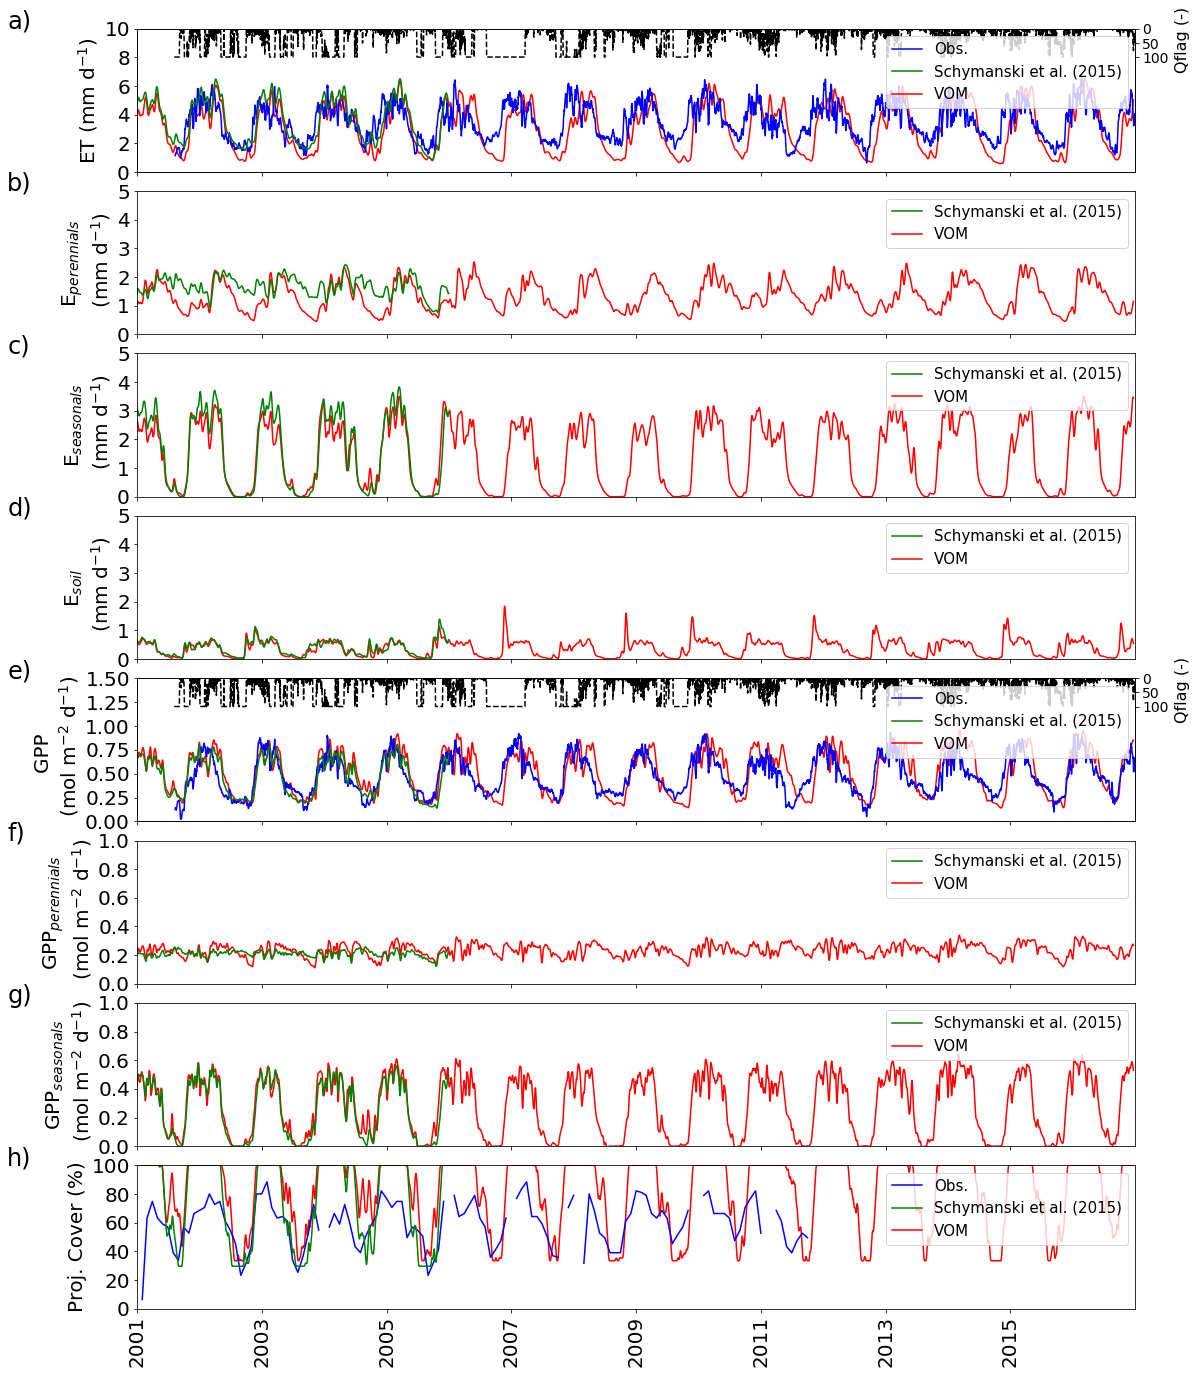

In [8]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
--assobs ../../data/DINGO/GPPdaily_howard.txt --assobs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_howard.txt --eobs ../../data/DINGO/Ea_howard.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "VOM" --figsize 16 19 --hpad -3 --sharex --labelsize 20 \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --wpad 2 \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 

**Figure S6.1.** Fluxes for Howard Springs from 2001-2016 (subset from 1980-2016) for a) ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM (red) and fluxtower observations (blue). Results of Schymanski et al. (2015) are shown in green. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed.

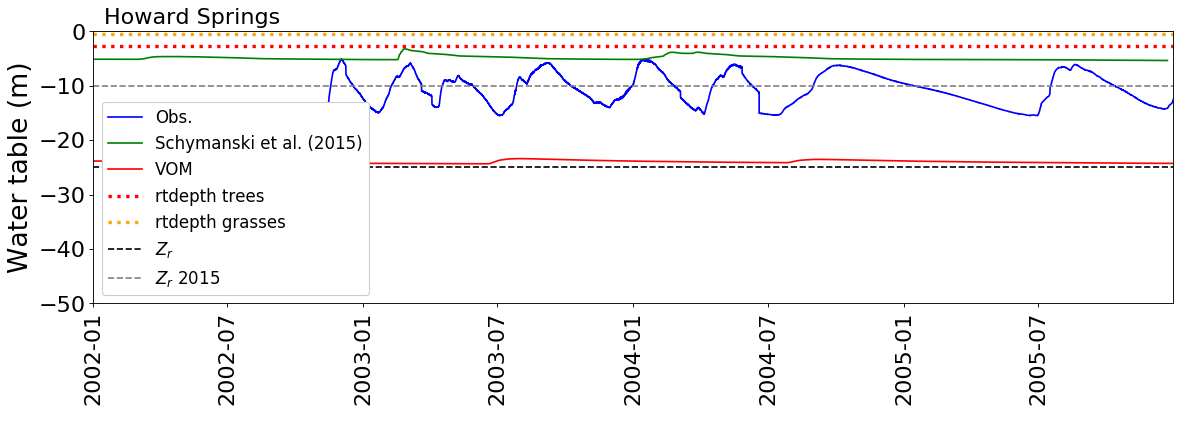

In [2]:
#plot groundwater tables, inclusive rooting depths

%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True  -ys 2002 -ye 2005 \
--ylabel "Water table (m)"  \
--labels VOM \
--colors "red" \
--i_cz 30  \
--i_cz2015 15 \
--i_zr 5  \
--i_zr2015 5 \
--obs ../../data/boreholes/RN021012/DataSet \
--pars ../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
--title "Howard Springs" --legend True --obs_freq D --mf_obs 1 --figsize 18 4 \
--obs_timeformat "%Y-%m-%d %H:%M:%S" --obs_freq H


**Figure S6.2.** Groundwater tables for Howard Springs with the VOM results are in red, rooting depths dotted lines, bedrock dashed lines. Observations are shown in blue, with for Howard Springs three boreholes at approx. 1 km distance. The results of Schymanski et al. (2015) are shown in green. 

<Figure size 1440x320 with 0 Axes>

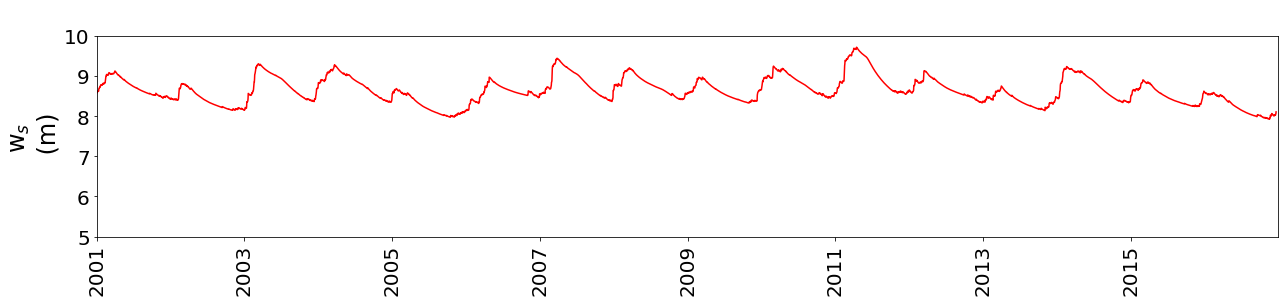

In [10]:
#HowardSprings
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v ws -ys 2001 -ye 2016 \
--colors red black --var "ws" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 10 --ymin 5  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.3.** Total water storage, smoothed with a moving average of 7 days, in meter water column for Howard Springs. 

<Figure size 1440x320 with 0 Axes>

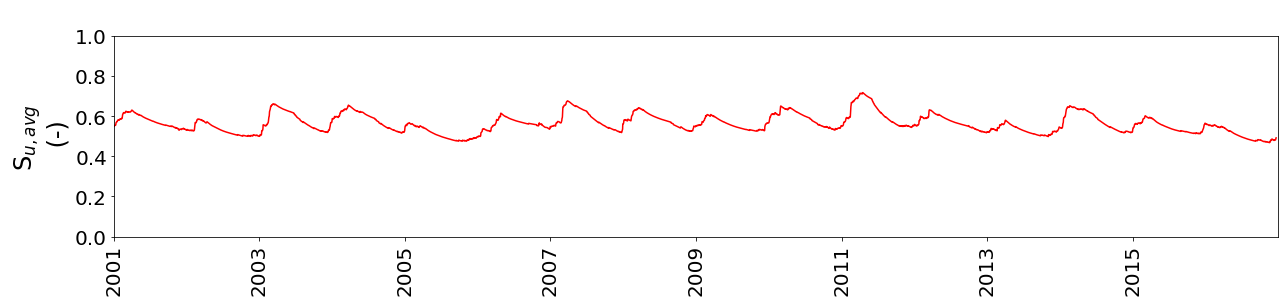

In [11]:
#HowardSprings
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--ylabel "Soil moisture (-)" --labels VOM \
--colors red black --var "su_avg" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 1 --ymin 0  --xloc_title -0.05 --yloc_title 1.10  --no_fig_lab


**Figure S6.4.** Average soil moisture saturation degree in the unsaturated zone, smoothed with a moving average of 7 days, for Howard Springs. 

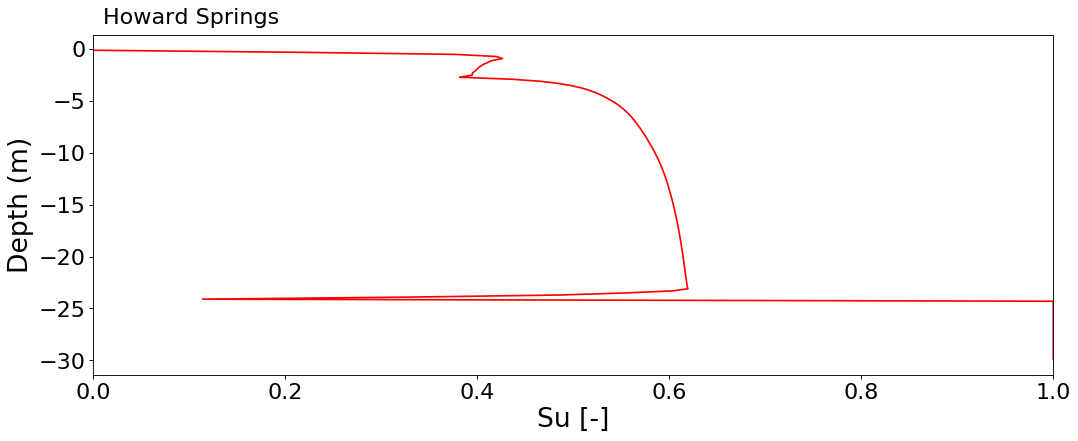

In [12]:
#HowardSprings
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
-cz 30 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.20 --xlim 0 1 --title "Howard Springs"



**Figure S6.5.** Time-averaged soil moisture profile for Howard Springs. 

In [13]:
#load 2015 data
data2015 = np.genfromtxt(VOM_2015, names=True)

vals2015 = data2015["ys"]
su_vals2015 = data2015["su_1"]
theta_vals2015 = (su_vals2015 * (thetas2015 - thetar2015)) + thetar2015

vals2015 = -1*(cz2015 - vals2015)

tmod2015 = np.arange(datetime(int(data2015["year"][0]),int(data2015["month"][0]),int(data2015["day"][0])), 
              datetime(int(data2015["year"][0]),int(data2015["month"][0]),int(data2015["day"][0]))+timedelta(days=len(vals2015) ), 
              timedelta(days=1)).astype(datetime)

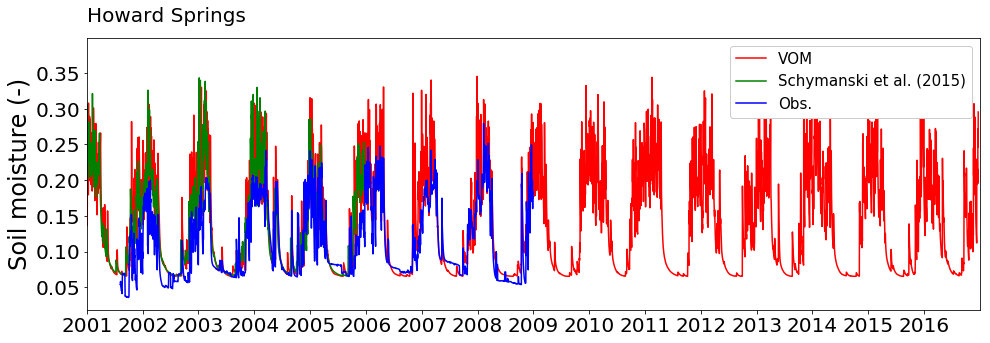

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))   

startyear = 2001
endyear = 2016

#ax = axes.flat
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
xloc_title = 0.00
yloc_title = 1.08
plot_label = ["Howard Springs", "b) Adelaide River", "c) Daly Uncleared",
             "d) Dry River", "e) Sturt Plains"]

#plot soil moisture results
iplot = 0
i = 0
ax.plot(tmod[i], theta_vals[i], color="red", label="VOM", zorder=1) 

#plot 2015 data
#if args.i2015 is not None:
if iplot ==0:
    ax.plot(tmod2015, theta_vals2015, color='green', label='Schymanski et al. (2015)', zorder=2)

ax.set_ylabel("Soil moisture (-)", size=24  )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    #tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))

ax.set_xlim([datetime(startyear,1, 1), datetime( endyear, 12, 31)])


ax.plot(tobs_sm[i], obs_sm[i], color='blue', label='Obs.', zorder=2)

#ax.set_xlim([tobs_sm[i][0], tobs_sm[i][-1]]) 
ax.legend(prop={'size':15}, framealpha=1  )

ax.text(xloc_title, yloc_title, plot_label[iplot], 
           ha='left', va='center', transform=ax.transAxes, fontsize=20)
iplot = iplot +1 

plt.show()


**Figure S6.6** Soil moisture values in the upper layer (0.2 m) for a) Howard Springs. Model results are shown in red, and observations for the upper 5 cm are shown in blue. 

<Figure size 1440x320 with 0 Axes>

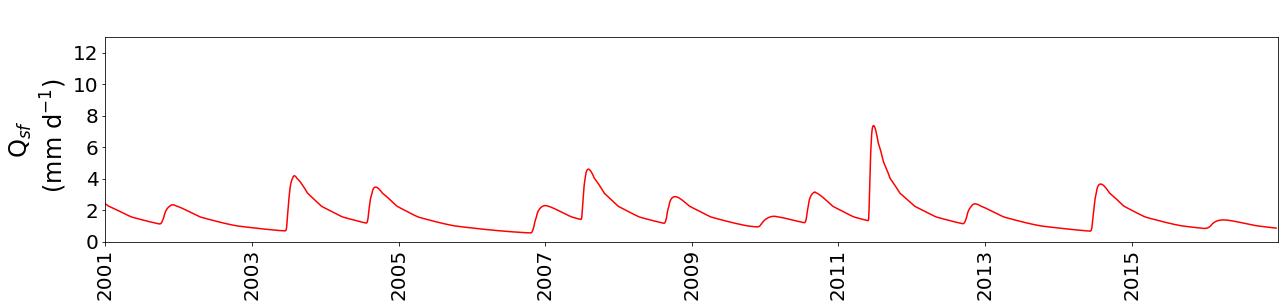

In [15]:
#HowardSprings
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--colors red black --var "spgfcf" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 13 --ymin 0  --xloc_title -0.05 --yloc_title 1.10  --no_fig_lab

**Figure S6.7.** Seepage faceflow, smoothed with a moving average of 7 days, for Howard Springs. 

<Figure size 1440x320 with 0 Axes>

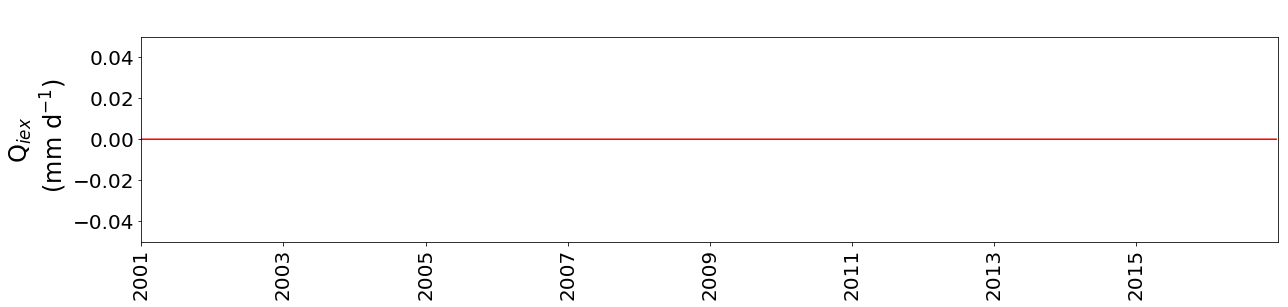

In [16]:
#HowardSprings
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--colors red black --var "infx" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0.05 --ymin -0.05  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.8.** Infiltration excess runoff for Howard Springs. 

## Adelaide River

<Figure size 1280x1520 with 0 Axes>

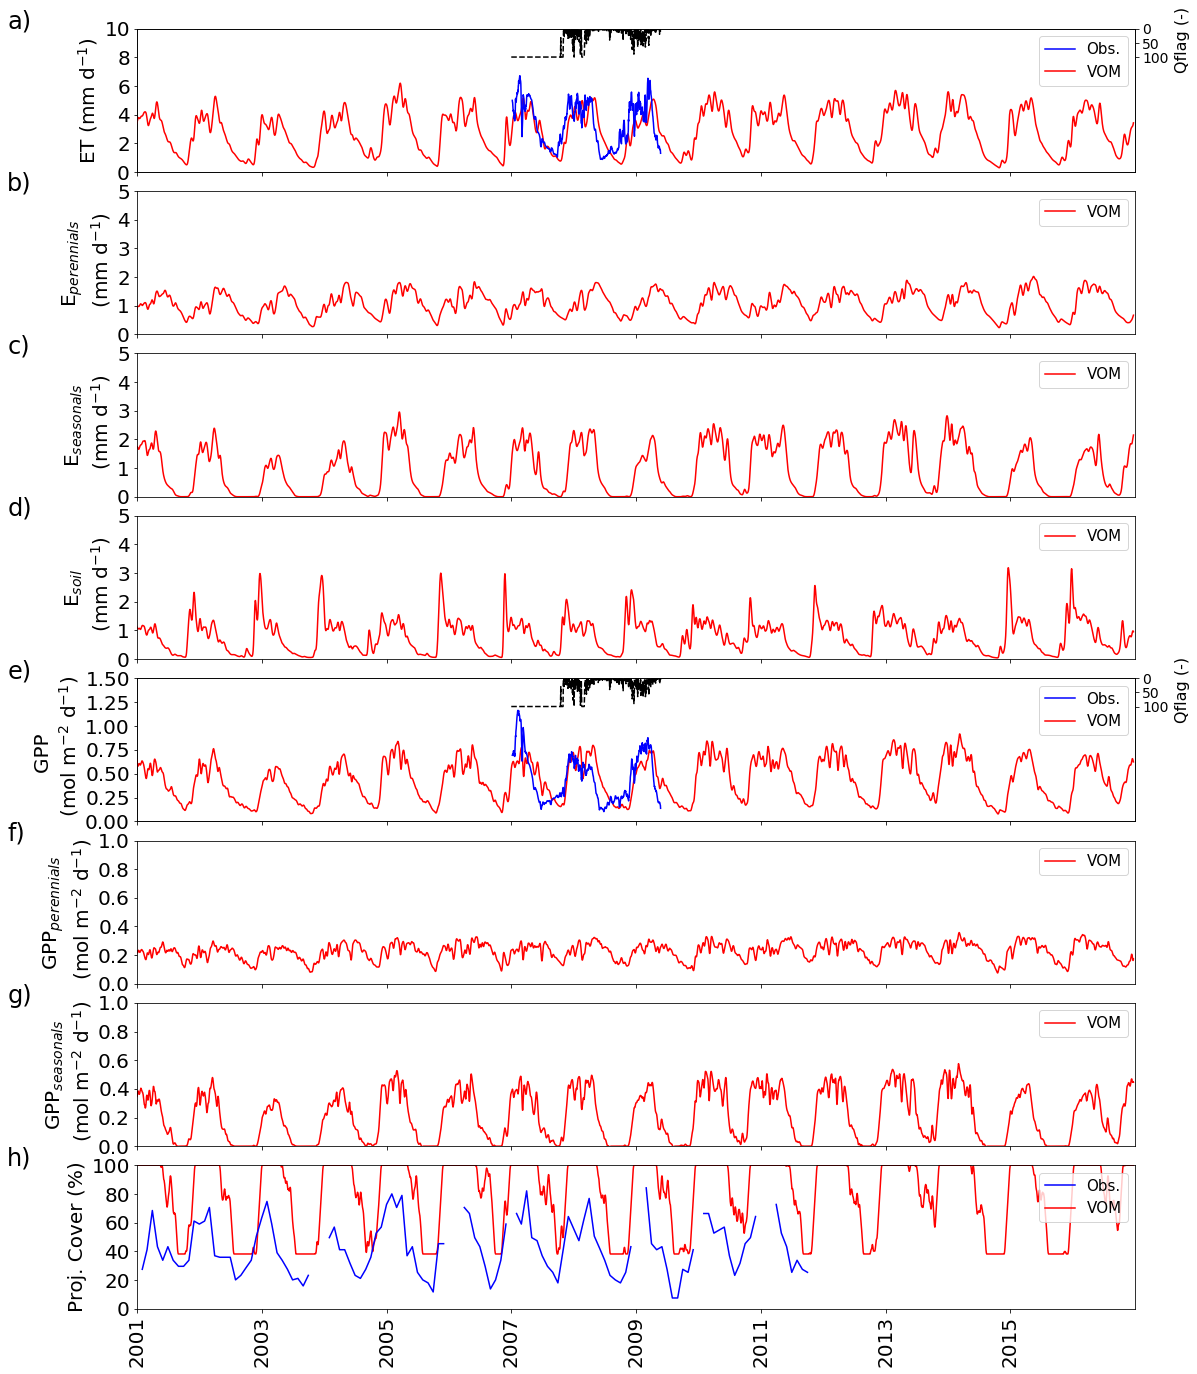

In [17]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_adelaide.txt --assobs_qc ../../data/DINGO_QC/FcQ_adelaide.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_adelaide.txt --eobs ../../data/DINGO/Ea_adelaide.txt \
--pcobs ../../data/fPAR/fpar_adelaide_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "VOM" --figsize 16 19 --hpad -3 --sharex --labelsize 20 \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --wpad 2 \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 

**Figure S6.9.** Fluxes for Adelaide River from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM with predicted cover (red), prescribed cover (black), prescribed cover with just mean monthly values (gray) and fluxtower observations (blue). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

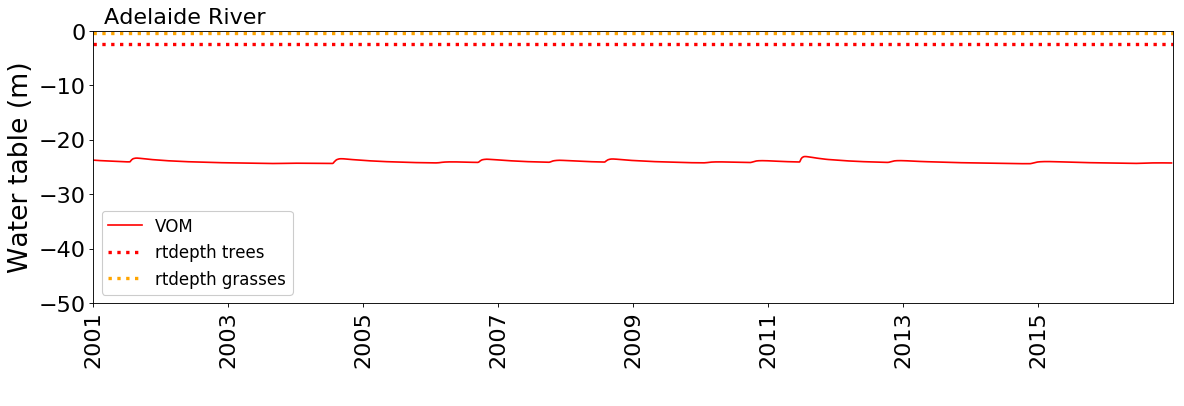

In [18]:
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --depth True  \
--ylabel "Water table (m)"  \
--labels VOM \
--colors "red" \
--i_cz 30  \
--pars ../../work/AdelaideRiver/freedrainage_cpcff1.0/best/input/pars.txt \
--title "Adelaide River" --legend True --figsize 18 4



**Figure S6.10.** Groundwater tables for Adelaide River. Model results are shown in red, rooting depths dotted lines, bedrock dashed lines.

<Figure size 1440x320 with 0 Axes>

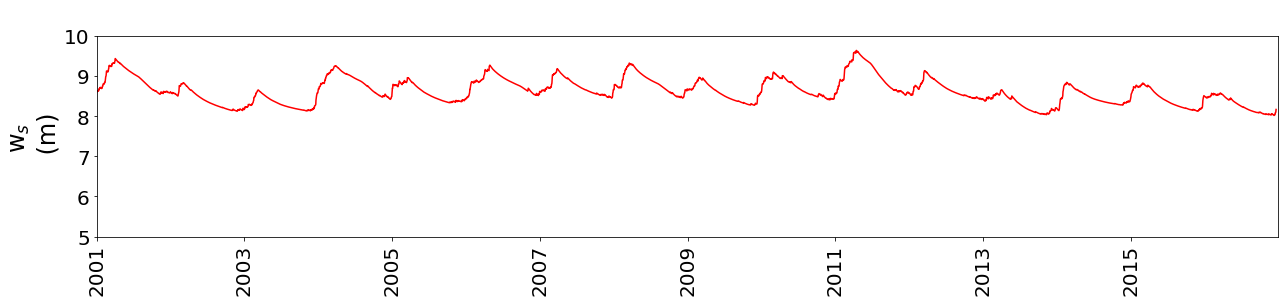

In [19]:
#AdelaideRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016  \
--colors red black  --var "ws"  --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 10 --ymin 5  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.11.** Total water storage, smoothed with a moving average of 7 days, in meter water column for Adelaide River. 

<Figure size 1440x320 with 0 Axes>

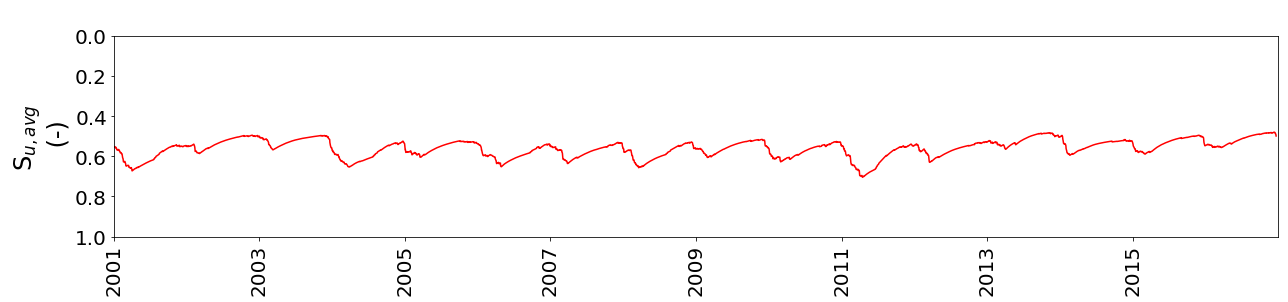

In [20]:
#AdelaideRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--colors red black  --var "su_avg"  --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0 --ymin 1  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.12.** Average soil moisture saturation degree in the unsaturated zone, smoothed with a moving average of 7 days, for Adelaide River. 

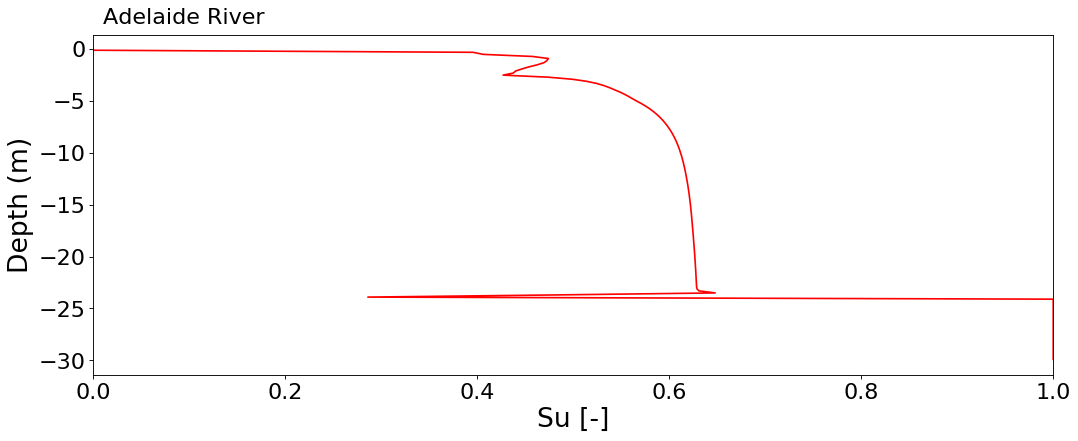

In [21]:
#AdelaideRiver
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
-cz 30 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.20 --xlim 0 1 --title "Adelaide River"



**Figure S6.13.** Time-average soil moisture profile for Adelaide River. 



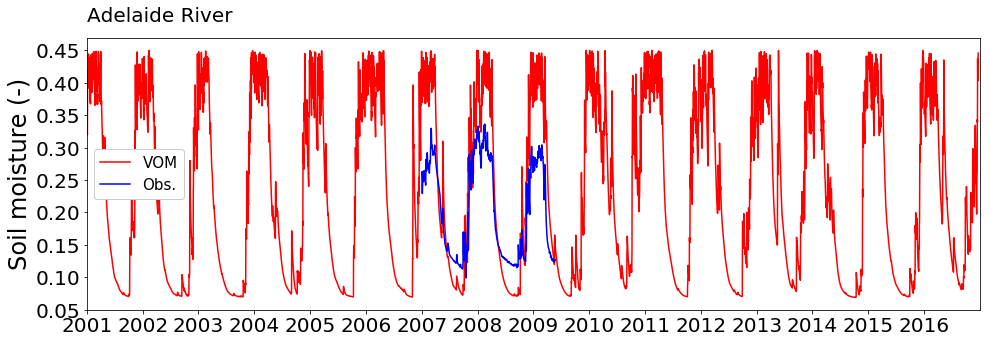

In [22]:

startyear = 2001
endyear = 2016

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))        
#ax = axes.flat
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
xloc_title = 0.00
yloc_title = 1.08
plot_label = ["a) Howard Springs", "Adelaide River", "c) Daly Uncleared",
             "d) Dry River", "e) Sturt Plains"]

#plot soil moisture results
iplot = 1
i = 1
ax.plot(tmod[i], theta_vals[i], color="red", label="VOM", zorder=1) 

ax.set_ylabel("Soil moisture (-)", size=24  )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    #tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))




ax.plot(tobs_sm[i], obs_sm[i], color='blue', label='Obs.', zorder=2)

ax.set_xlim([datetime(startyear,1, 1), datetime( endyear, 12, 31)])
ax.legend(prop={'size':15}, framealpha=1  )

ax.text(xloc_title, yloc_title, plot_label[iplot], 
           ha='left', va='center', transform=ax.transAxes, fontsize=20)
iplot = iplot +1 

plt.show()


**Figure S6.14.** Soil moisture values in the upper layer (0.2 m) for Adelaide River. Model results are shown in red, and observations for the upper 5 cm are shown in blue. 

<Figure size 1440x320 with 0 Axes>

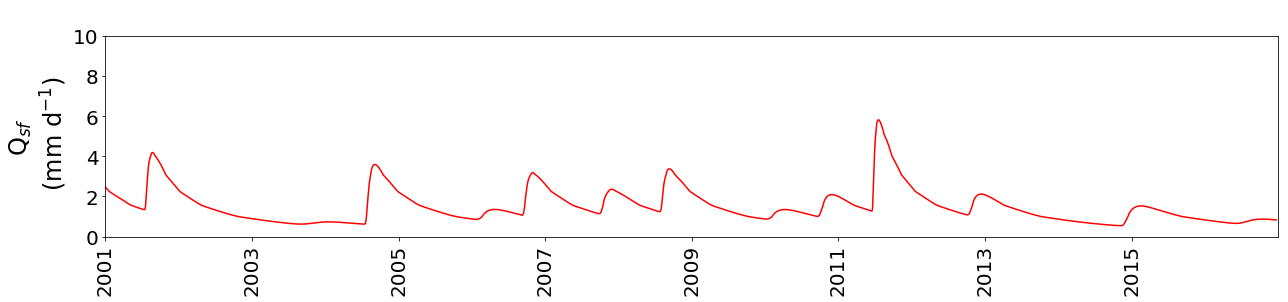

In [23]:
#AdelaideRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--colors red black --var "spgfcf"  --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 10 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.15.** Seepage faceflow, smoothed with a moving average of 7 days, for Adelaide River. 

<Figure size 1440x320 with 0 Axes>

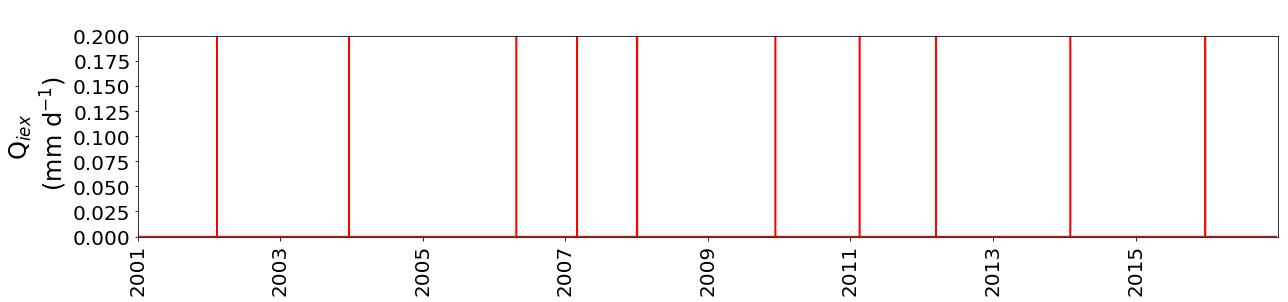

In [24]:
#AdelaideRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "infx"  --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0.2 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.16.** Infiltration excess runoff for Adelaide River. 

## Daly Uncleared

<Figure size 1280x1520 with 0 Axes>

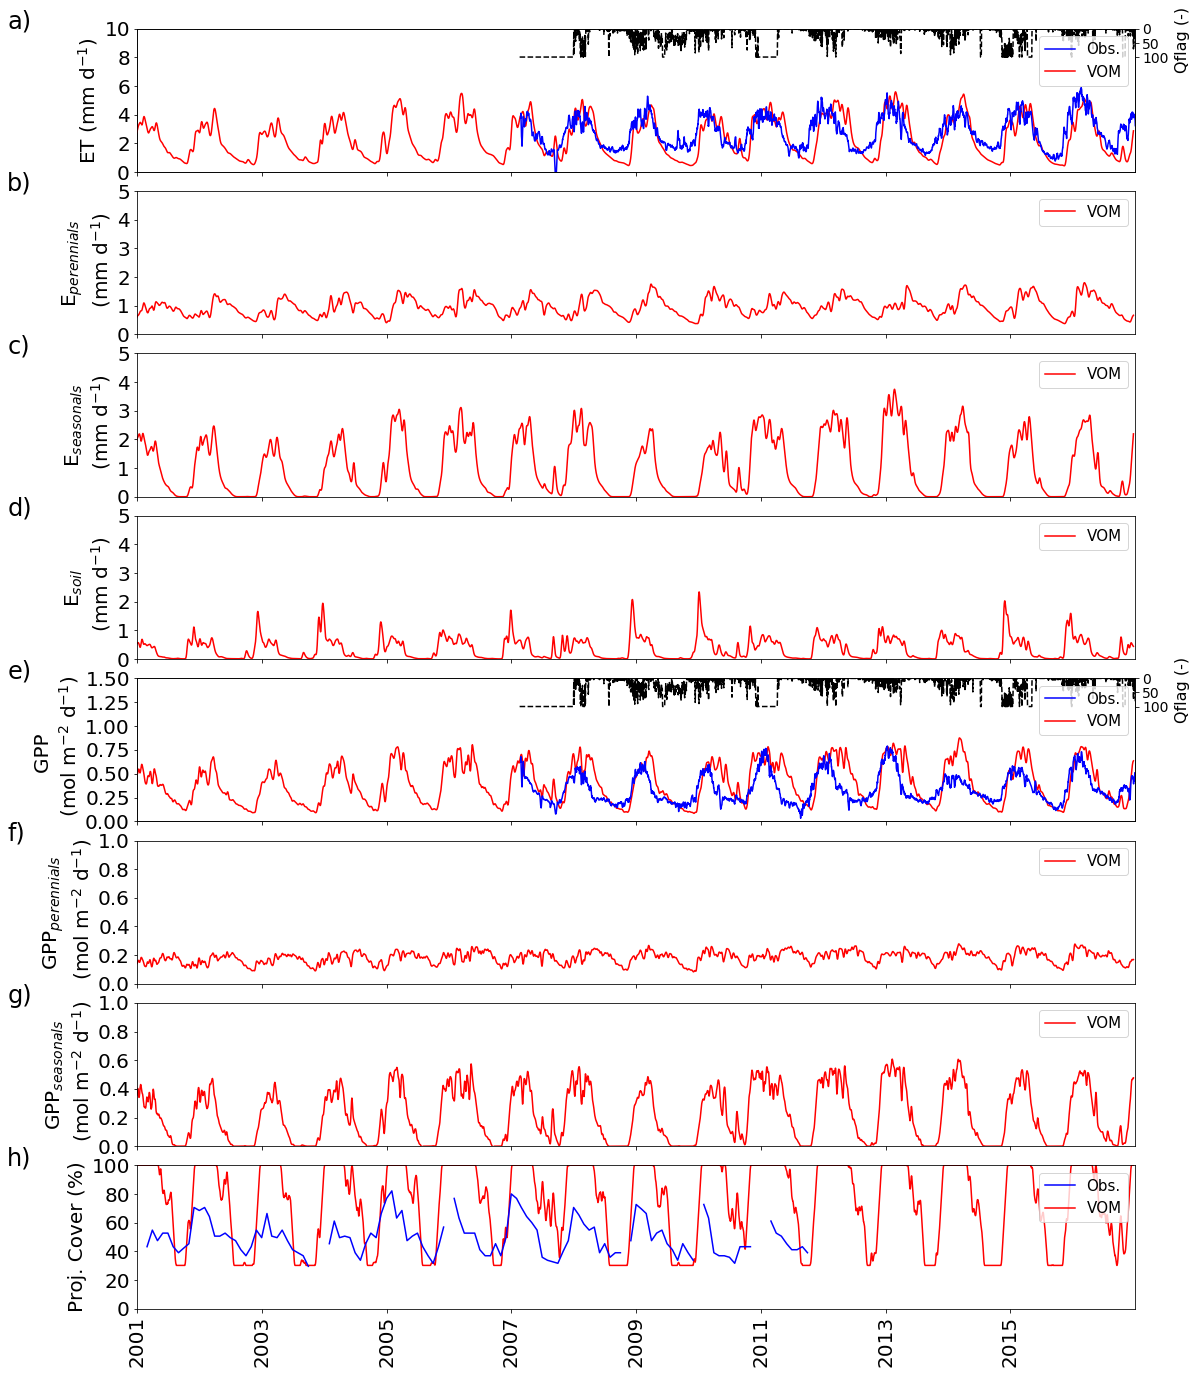

In [25]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_daly.txt --assobs_qc ../../data/DINGO_QC/FcQ_daly.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_daly.txt --eobs ../../data/DINGO/Ea_daly.txt \
--pcobs ../../data/fPAR/fpar_daly_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "VOM" --figsize 16 19 --hpad -3 --sharex --labelsize 20 \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --wpad 2 \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 

**Figure S6.17.** Fluxes for Daly Uncleared from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM (red) and fluxtower observations (blue). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

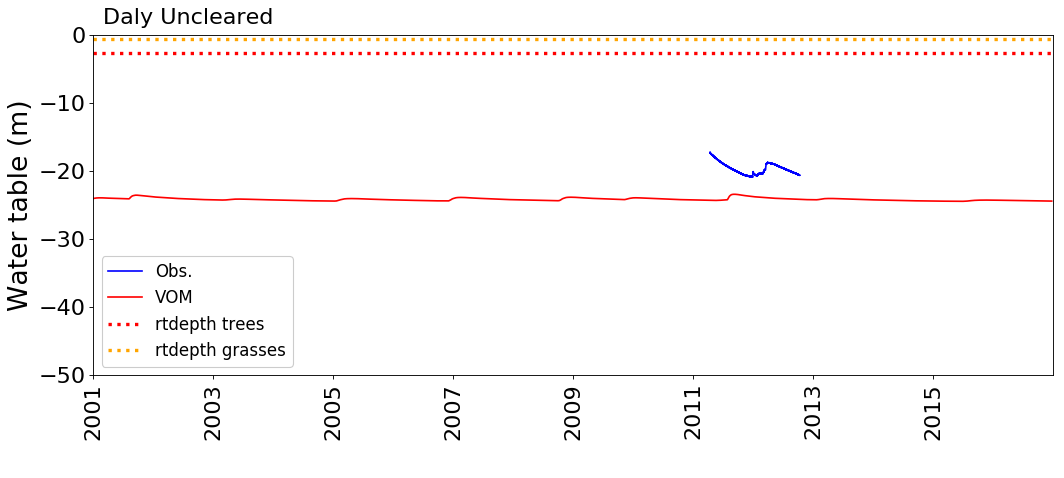

In [26]:
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --depth True \
--ylabel "Water table (m)"  \
--labels VOM \
--colors "red" \
--i_cz 30  \
--pars ../../work/DalyUncleared/freedrainage_cpcff1.0/best/input/pars.txt \
--obs ../../data/boreholes/RN033034.csv \
--title "Daly Uncleared" --legend True --obs_freq H --mf_obs -1



**Figure S6.18.** Groundwater tables for Daly Uncleared. Model results are shown in red, rooting depths dotted lines, bedrock dashed lines. Observations are shown in blue, with for Daly Uncleared one borehole at 2 km.

<Figure size 1440x320 with 0 Axes>

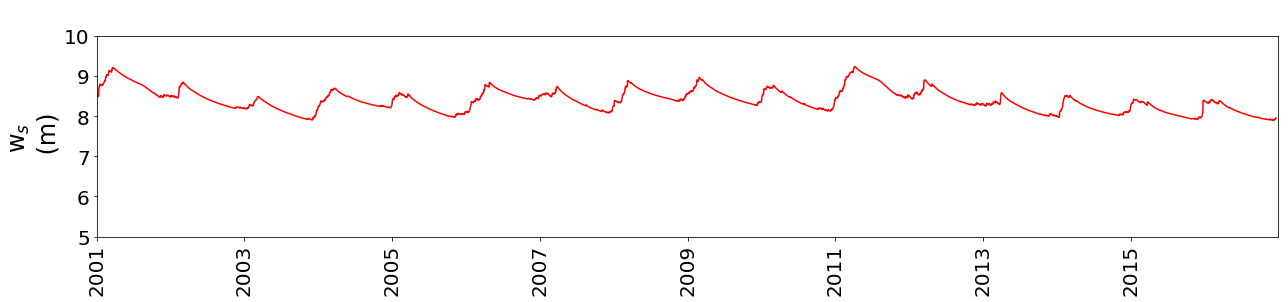

In [27]:
#AdelaideRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "ws" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 10 --ymin 5  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab


**Figure S6.19.** Total water storage, smoothed with a moving average of 7 days, in meter water column for Daly Uncleared. 

<Figure size 1440x320 with 0 Axes>

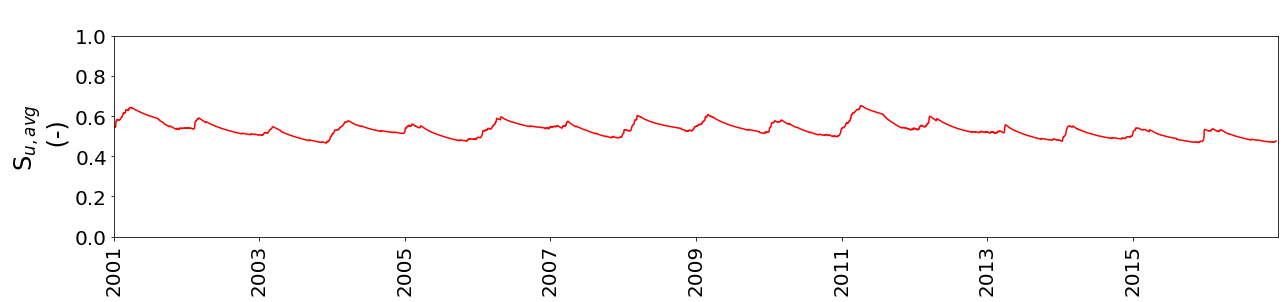

In [28]:
#DalyUncleared
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "su_avg" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 1 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.20.** Average soil moisture saturation degree in the unsaturated zone, smoothed with a moving average of 7 days, for Daly Uncleared. 

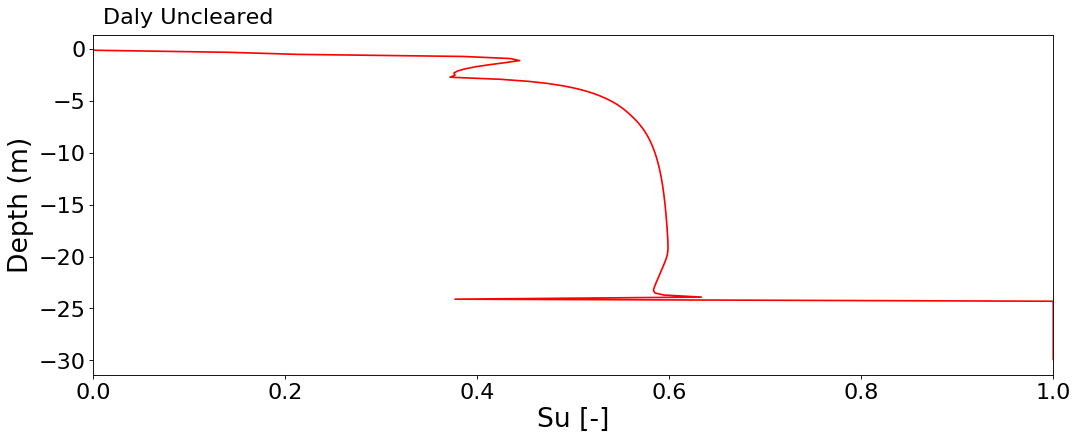

In [29]:
#DalyUncleared
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
-cz 30 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.20 --xlim 0 1 --title "Daly Uncleared"



**Figure S6.21.** Time-average soil moisture profile for Daly Uncleared. 

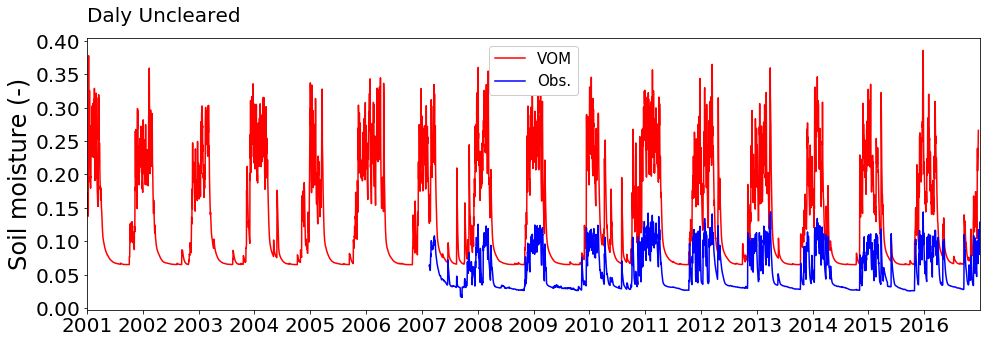

In [30]:
startyear = 2001
endyear = 2016

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))        
#ax = axes.flat
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
xloc_title = 0.00
yloc_title = 1.08
plot_label = ["a) Howard Springs", "b) Adelaide River", "Daly Uncleared",
             "d) Dry River", "e) Sturt Plains"]

#plot soil moisture results
iplot = 2
i = 2
ax.plot(tmod[i], theta_vals[i], color="red", label="VOM", zorder=1) 

#plot 2015 data
#if args.i2015 is not None:
if iplot ==0:
    ax.plot(tmod2015, theta_vals2015, color='green', label='Schymanski et al. (2015)', zorder=2)

ax.set_ylabel("Soil moisture (-)", size=24  )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    #tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))




ax.plot(tobs_sm[i], obs_sm[i], color='blue', label='Obs.', zorder=2)

ax.set_xlim([datetime(startyear,1, 1), datetime( endyear, 12, 31)])
ax.legend(prop={'size':15}, framealpha=1  )

ax.text(xloc_title, yloc_title, plot_label[iplot], 
           ha='left', va='center', transform=ax.transAxes, fontsize=20)
iplot = iplot +1 

plt.show()


**Figure S6.22** Soil moisture values in the upper layer (0.2 m) for Daly Uncleared. Model results are shown in red, and observations for the upper 5 cm are shown in blue. 

<Figure size 1440x320 with 0 Axes>

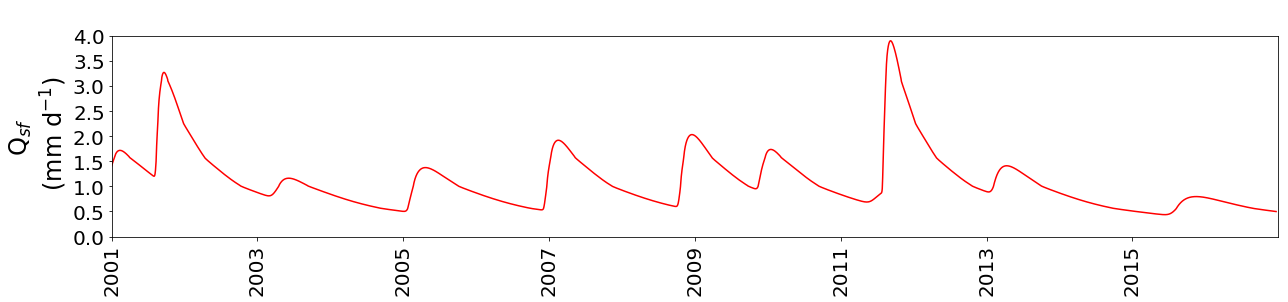

In [31]:
#DalyUncleared
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "spgfcf" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 4 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.23.** Seepage faceflow, smoothed with a moving average of 7 days, for Daly Uncleared. 

<Figure size 1440x320 with 0 Axes>

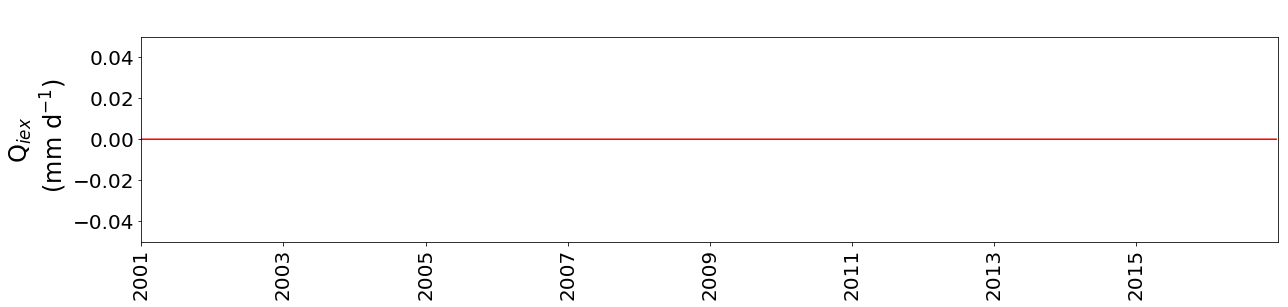

In [32]:
#DalyUncleared
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "infx" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0.05 --ymin -0.05  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab


**Figure S6.24.** Infiltration excess runoff for Daly Uncleared. 

## Dry River

<Figure size 1280x1520 with 0 Axes>

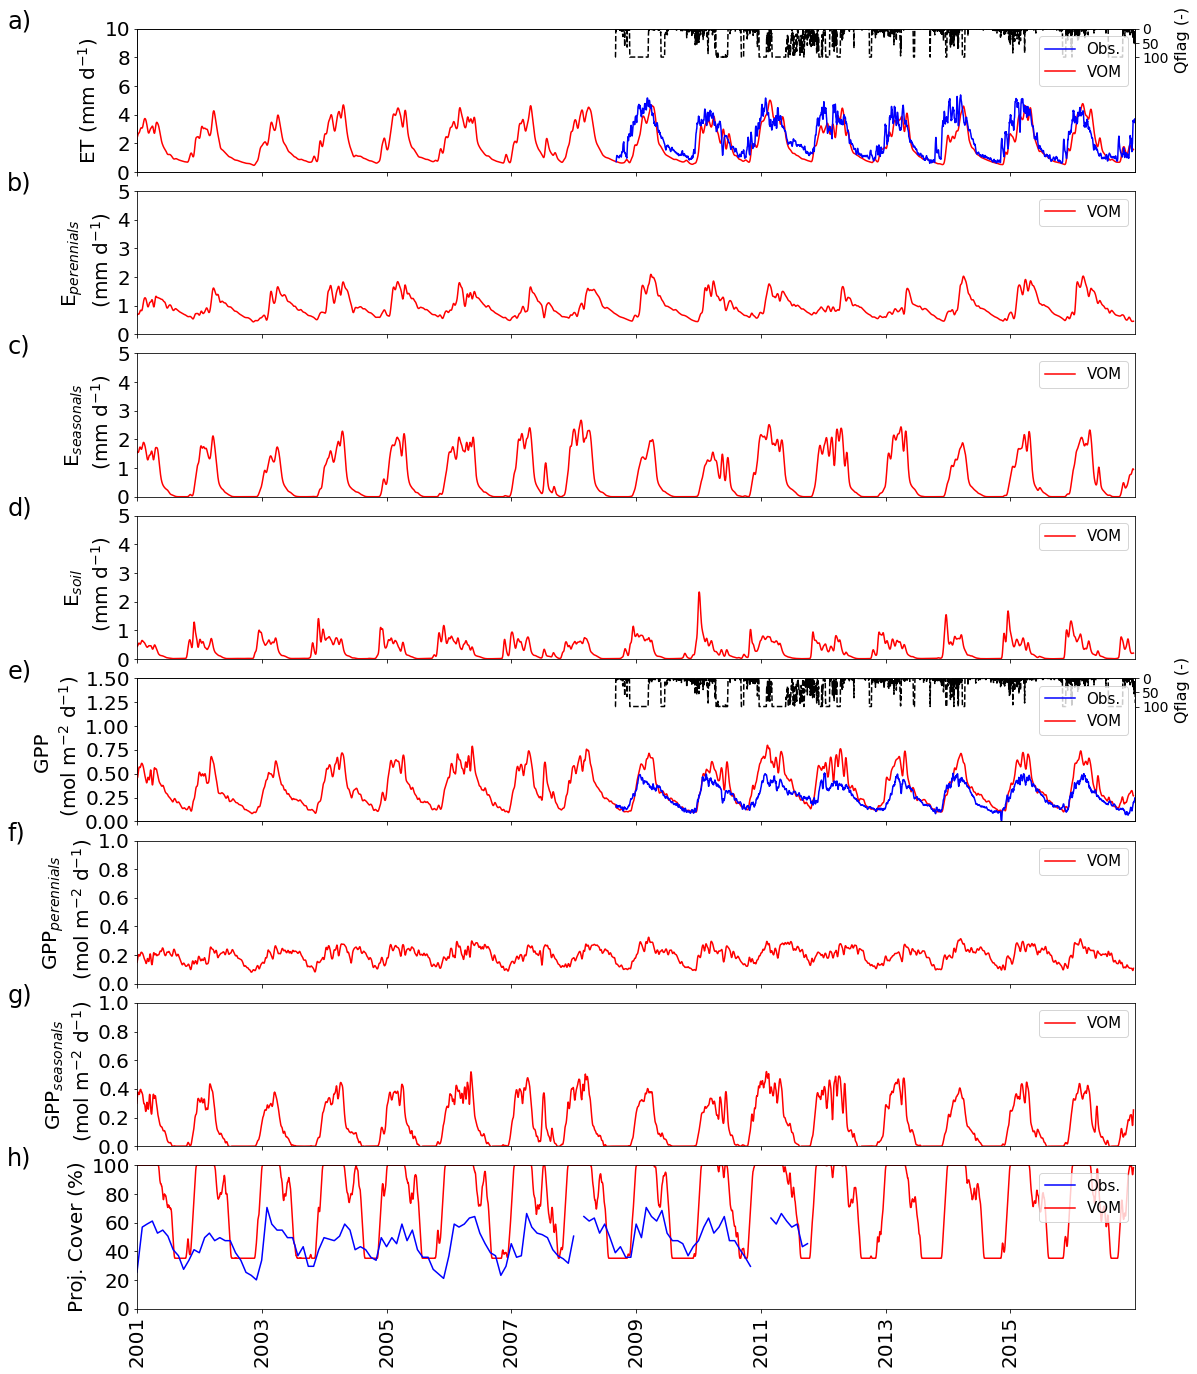

In [33]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 \
--assobs ../../data/DINGO/GPPdaily_dry.txt --assobs_qc ../../data/DINGO_QC/FcQ_dry.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_dry.txt --eobs ../../data/DINGO/Ea_dry.txt \
--pcobs ../../data/fPAR/fpar_dry_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "VOM" --figsize 16 19 --hpad -3 --sharex --labelsize 20 \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --wpad 2 \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 

**Figure S6.25.** Fluxes for Dry River from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM (red) and fluxtower observations (blue). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

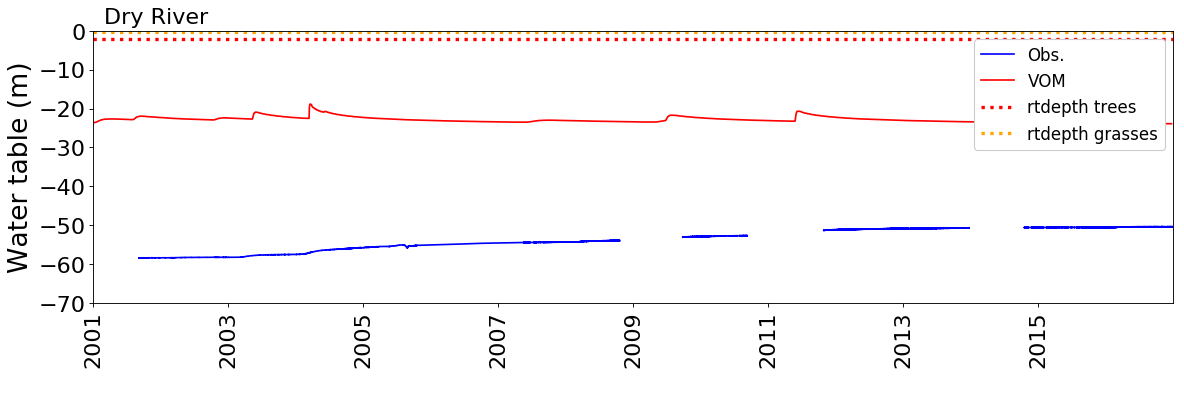

In [34]:
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --depth True \
--ylabel "Water table (m)"  \
--labels VOM \
--colors "red" \
--i_cz 30 --ylim -70 0 \
--pars ../../work/DryRiver/freedrainage_cpcff1.0/best/input/pars.txt \
--obs ../../data/boreholes/RN030695.csv \
--title "Dry River" --legend True --obs_freq H --mf_obs -1 --figsize 18 4 



**Figure S6.26.** Groundwater tables for Dry River. Model results are shown in red, rooting depths dotted lines, bedrock dashed lines. Observations are shown in blue, with for Dry River one borehole at 13 km distance.

<Figure size 1440x320 with 0 Axes>

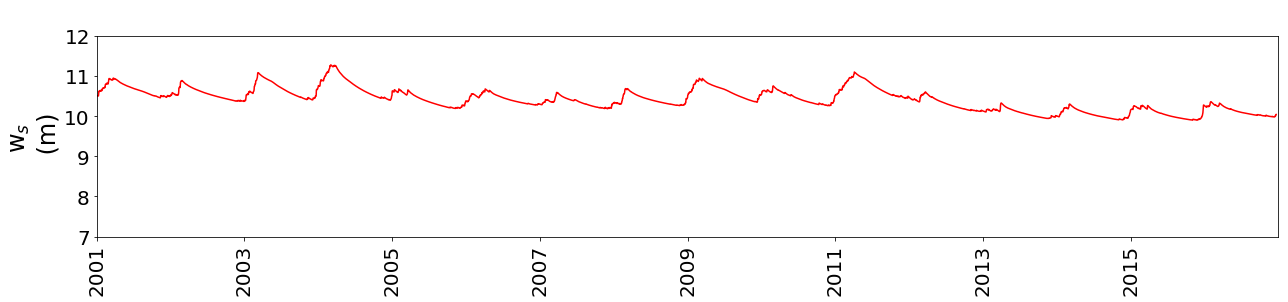

In [35]:
#DryRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "ws" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 12 --ymin 7  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.27.** Total water storage, smoothed with a moving average of 7 days, in meter water column Dry River. 

<Figure size 1440x320 with 0 Axes>

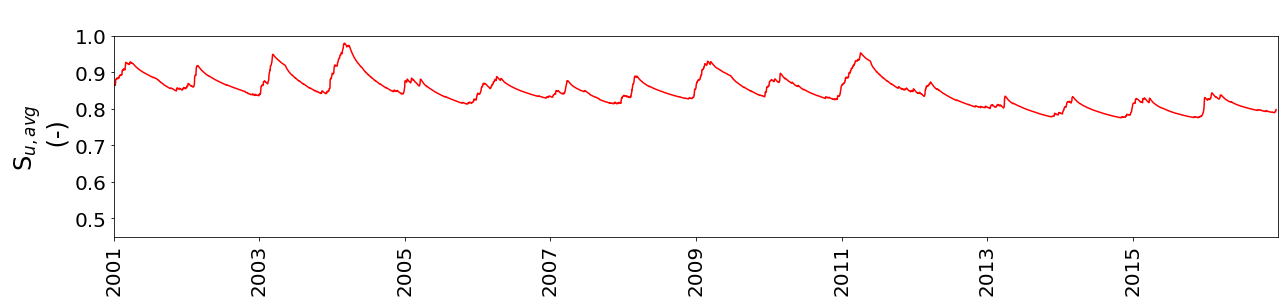

In [36]:
#DryRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "su_avg" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 1 --ymin 0.45  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.28.** Average soil moisture saturation degree in the unsaturated zone, smoothed with a moving average of 7 days, for Dry River. 

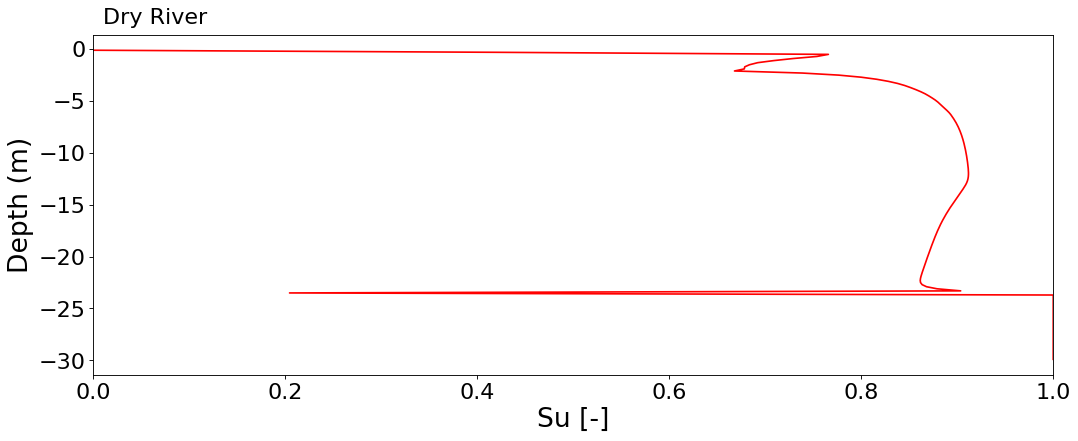

In [37]:
#DryRiver
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
-cz 30 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.20 --xlim 0 1 --title "Dry River"



**Figure S6.29.** Time-average soil moisture profile for Dry River. 

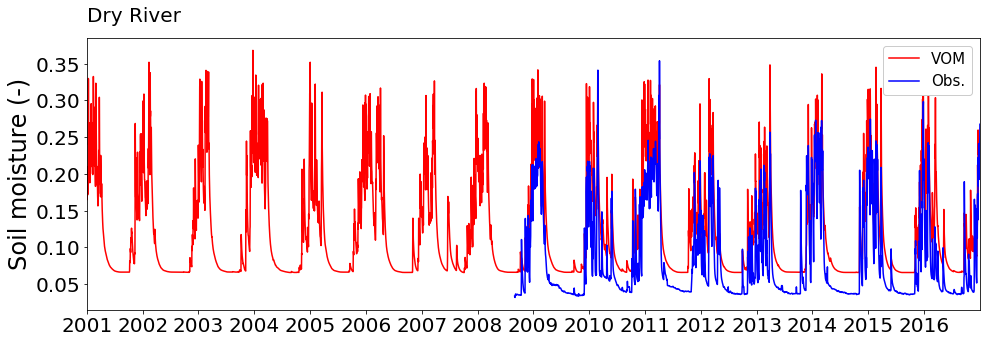

In [38]:
startyear = 2001
endyear = 2016

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))        
#ax = axes.flat
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
xloc_title = 0.00
yloc_title = 1.08
plot_label = ["a) Howard Springs", "b) Adelaide River", "c) Daly Uncleared",
             "Dry River", "e) Sturt Plains"]

#plot soil moisture results
iplot = 3
i = 3
ax.plot(tmod[i], theta_vals[i], color="red", label="VOM", zorder=1) 

#plot 2015 data
#if args.i2015 is not None:
if iplot ==0:
    ax.plot(tmod2015, theta_vals2015, color='green', label='Schymanski et al. (2015)', zorder=2)

ax.set_ylabel("Soil moisture (-)", size=24  )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    #tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))




ax.plot(tobs_sm[i], obs_sm[i], color='blue', label='Obs.', zorder=2)

ax.set_xlim([datetime(startyear,1, 1), datetime( endyear, 12, 31)])
ax.legend(prop={'size':15}, framealpha=1  )

ax.text(xloc_title, yloc_title, plot_label[iplot], 
           ha='left', va='center', transform=ax.transAxes, fontsize=20)
iplot = iplot +1 

plt.show()


**Figure S6.30.** Soil moisture values in the upper layer (0.2 m) for Dry River. Model results are shown in red, and observations for the upper 5 cm are shown in blue. 

<Figure size 1440x320 with 0 Axes>

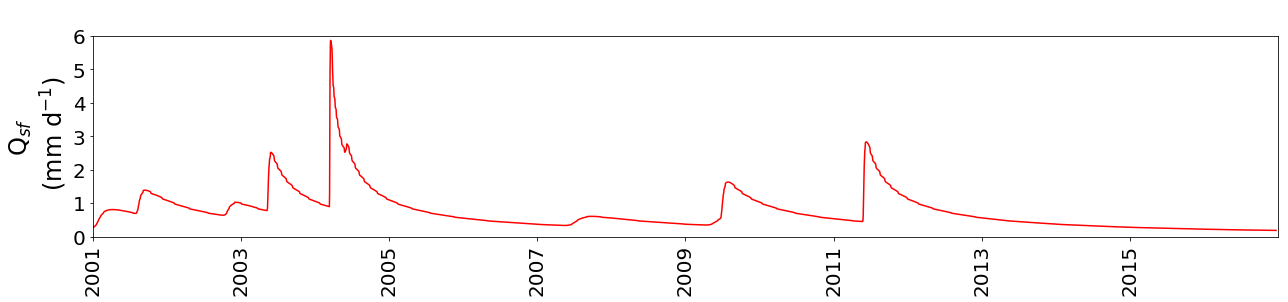

In [39]:
#DryRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "spgfcf" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 6 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.31.** Seepage faceflow, smoothed with a moving average of 7 days, for Dry River. 

<Figure size 1440x320 with 0 Axes>

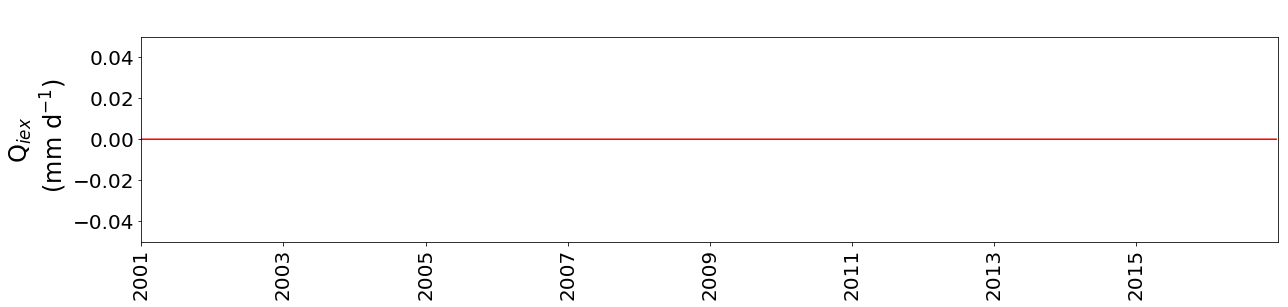

In [40]:
#DryRiver
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "infx" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0.05 --ymin -0.05  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.32.** Infiltration excess runoff for Dry River. 

## Sturt Plains

<Figure size 1280x1520 with 0 Axes>

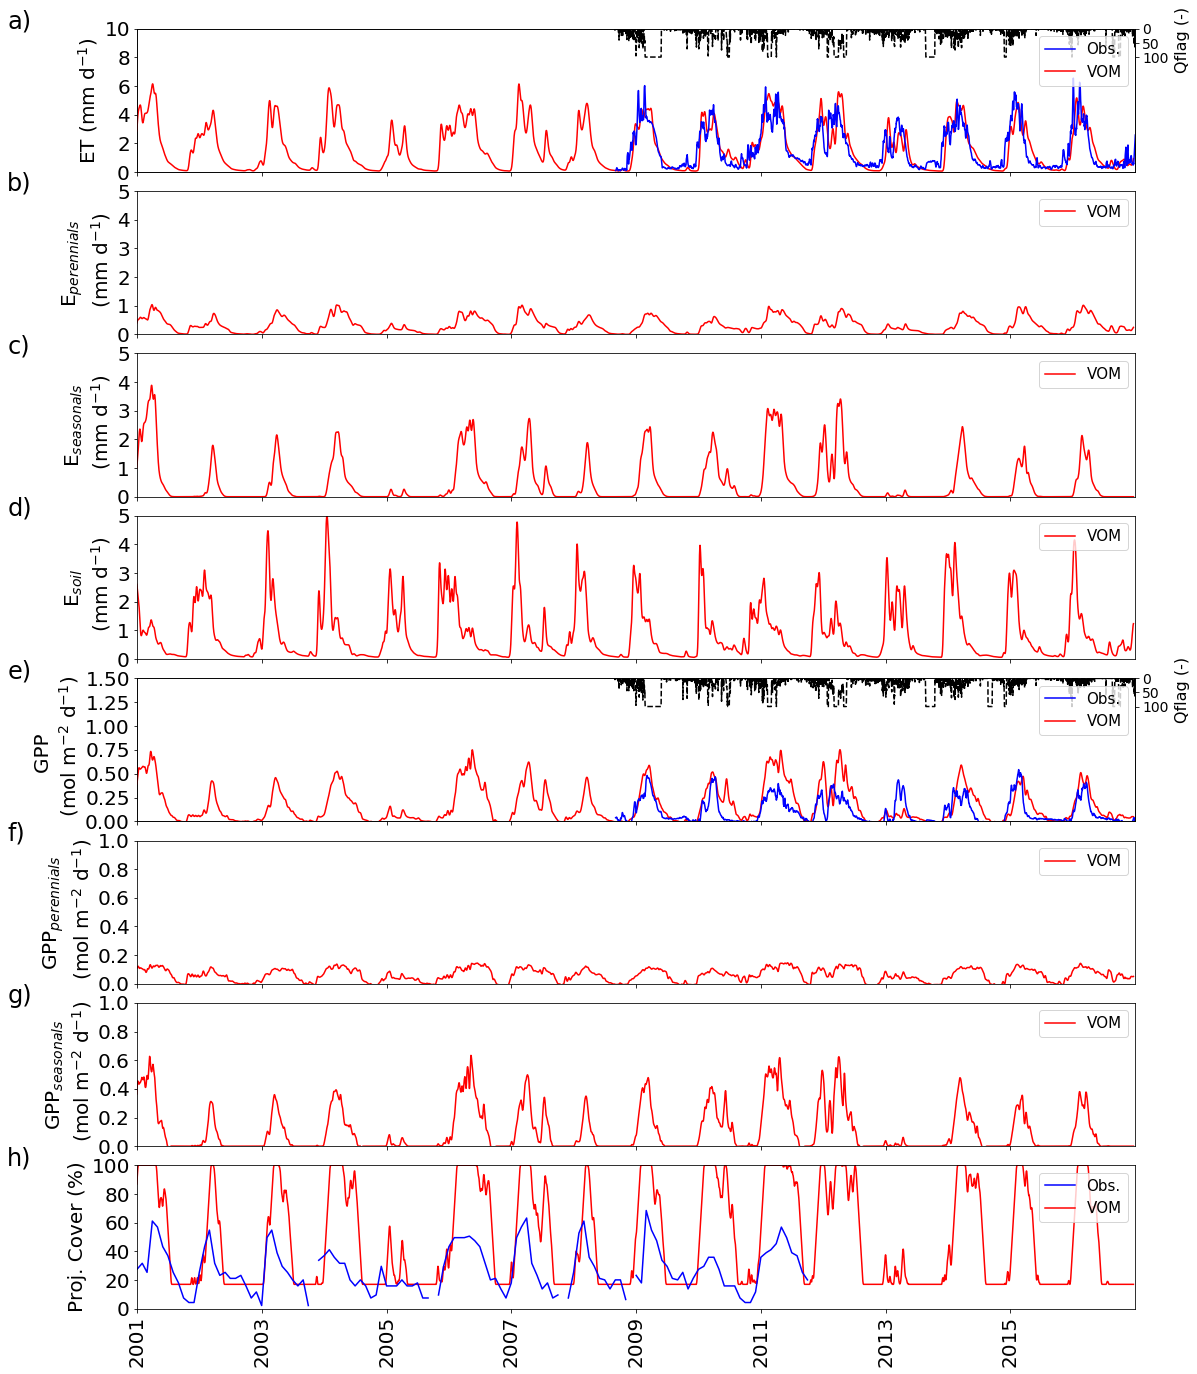

In [41]:
%run ../../src_py/plot_timeseries.py \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016  \
--assobs ../../data/DINGO/GPPdaily_sturt.txt --assobs_qc ../../data/DINGO_QC/FcQ_sturt.txt \
--eobs_qc ../../data/DINGO_QC/FeQ_sturt.txt --eobs ../../data/DINGO/Ea_sturt.txt \
--pcobs ../../data/fPAR/fpar_sturt_v5.txt \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "VOM" --figsize 16 19 --hpad -3 --sharex --labelsize 20 \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --wpad 2 \
--ymax 10 5 5 5 1.5 1.0 1.0 100 \
--ymin 0 0 0 0 0 0 0 0 

**Figure S6.33.** Fluxes for Sturt Plains from 2001-2016 (subset from 1980-2016) for a) total ET, b) transpiration perennials (trees), c) transpiration seasonals (grasses), d) soil evaporation, e) total GPP, f) GPP perennials (trees), g) GPP seasonals (grasses), all smoothed with a moving average of 7 days, for the VOM (red) and fluxtower observations (blue). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

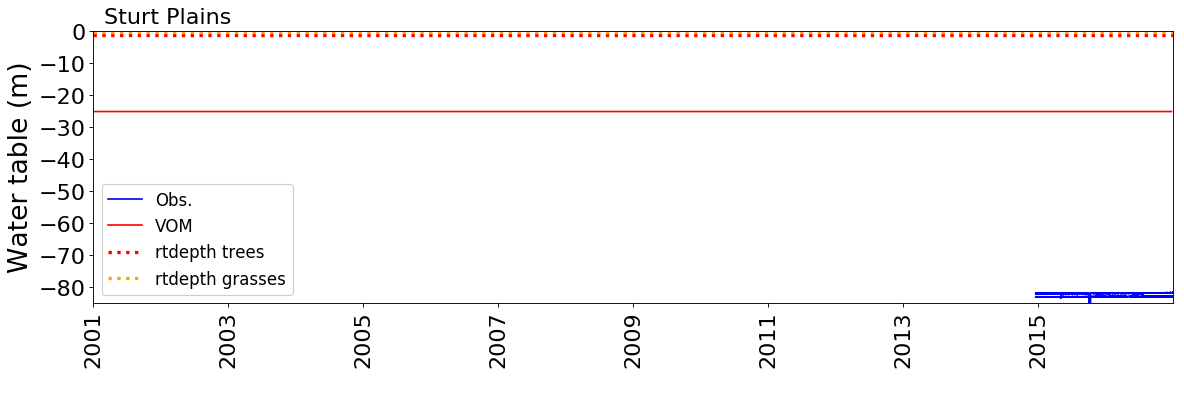

In [42]:
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --depth True \
--ylabel "Water table (m)"  \
--labels VOM \
--colors "red" \
--i_cz 30 \
--pars ../../work/SturtPlains/freedrainage_cpcff1.0/best/input/pars.txt \
--obs ../../data/boreholes/DataSetExport-DepthBelowGround.Publish.110.12@RN036471-20200610191742.csv\
../../data/boreholes/DataSetExport-DepthBelowGround.Publish@RN036471-20200610191740.csv \
--title "Sturt Plains" --legend True --obs_freq H --obs_header 3 --obs_col 1 \
--obs_timeformat "%Y-%m-%d %S:%H:%M" --ylim -85 0 --figsize 18 4


**Figure S6.34.** Groundwater tables for Sturt Plains. Model results are shown in red, rooting depths dotted lines, bedrock dashed lines. Observations are shown in blue, with for Sturt Plains two boreholes at 10 km distance.

<Figure size 1440x320 with 0 Axes>

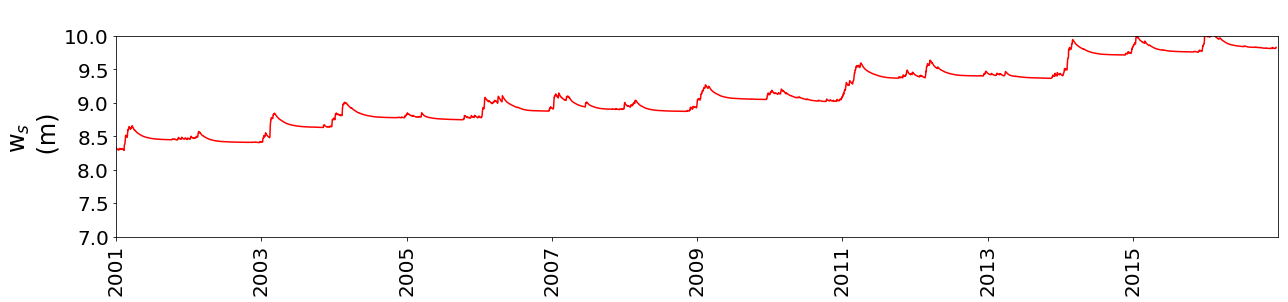

In [43]:
#SturtPlains
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "ws" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 10 --ymin 7  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.35.** Total water storage, smoothed with a moving average of 7 days, in meter water column for Sturt Plains. 

<Figure size 1440x320 with 0 Axes>

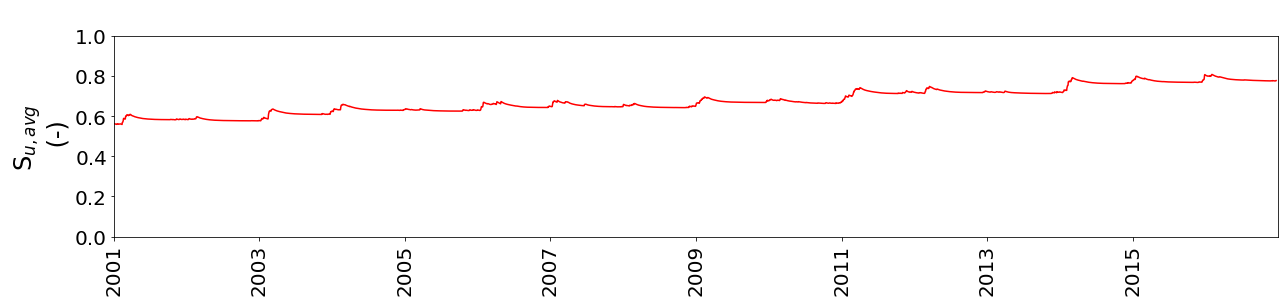

In [44]:
#SturtPlains
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "su_avg" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 1 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.36.** Average soil moisture saturation degree in the unsaturated zone, smoothed with a moving average of 7 days, for Sturt Plains. 

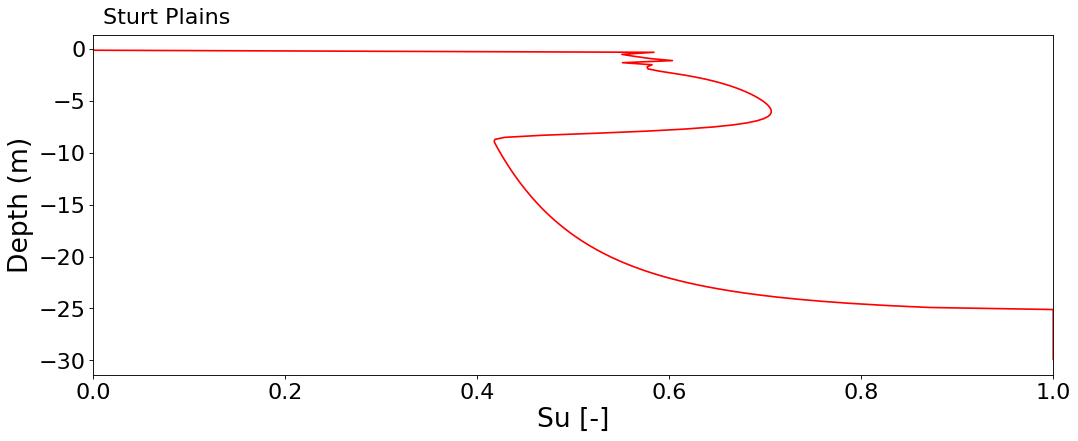

In [45]:
#SturtPlains
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
-cz 30 -nd 3650 --ylabel "Depth (m)" --xlabel "Su [-]"  -d 0.20 --xlim 0 1 --title "Sturt Plains"


**Figure S6.37.** Time-average soil moisture profile for Sturt Plains. 

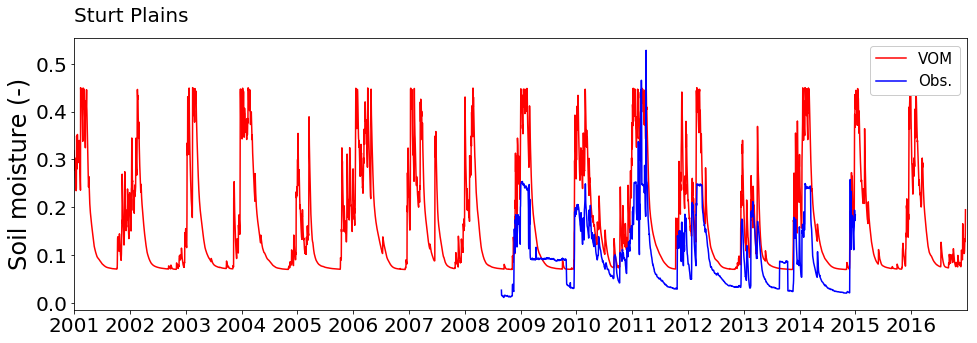

In [46]:
startyear = 2001
endyear = 2016

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))        
#ax = axes.flat
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
xloc_title = 0.00
yloc_title = 1.08
plot_label = ["a) Howard Springs", "b) Adelaide River", "c) Daly Uncleared",
             "Dry River", "Sturt Plains"]

#plot soil moisture results
iplot = 4
i = 4
ax.plot(tmod[i], theta_vals[i], color="red", label="VOM", zorder=1) 

#plot 2015 data
#if args.i2015 is not None:
if iplot ==0:
    ax.plot(tmod2015, theta_vals2015, color='green', label='Schymanski et al. (2015)', zorder=2)

ax.set_ylabel("Soil moisture (-)", size=24  )
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    #tick.label.set_rotation(90)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

locator = mdate.YearLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y'))


ax.plot(tobs_sm[i], obs_sm[i], color='blue', label='Obs.', zorder=2)

ax.set_xlim([datetime(startyear,1, 1), datetime( endyear, 12, 31)])
ax.legend(prop={'size':15}, framealpha=1  )

ax.text(xloc_title, yloc_title, plot_label[iplot], 
           ha='left', va='center', transform=ax.transAxes, fontsize=20)
iplot = iplot +1 

plt.show()


**Figure S6.38** Soil moisture values in the upper layer (0.2 m) for Sturt Plains. Model results are shown in red, and observations for the upper 5 cm are shown in blue. 

<Figure size 1440x320 with 0 Axes>

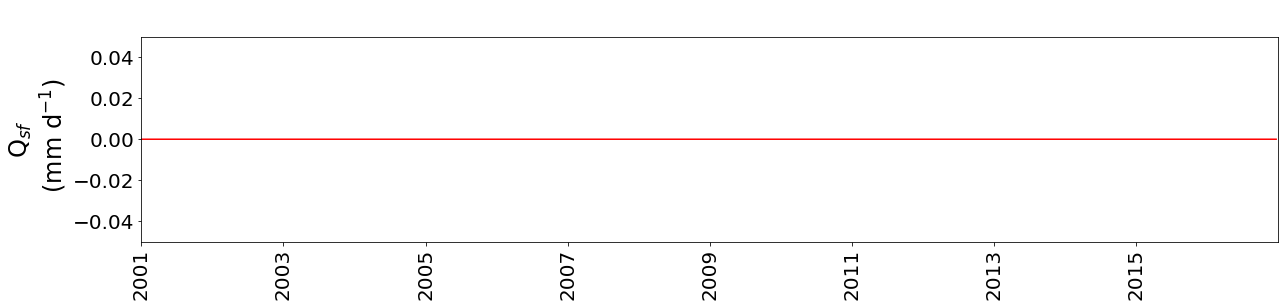

In [47]:
#SturtPlains
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "spgfcf" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 0.05 --ymin -0.05 --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab


**Figure S6.39.** Seepage faceflow, smoothed with a moving average of 7 days, for Sturt Plains. 

<Figure size 1440x320 with 0 Axes>

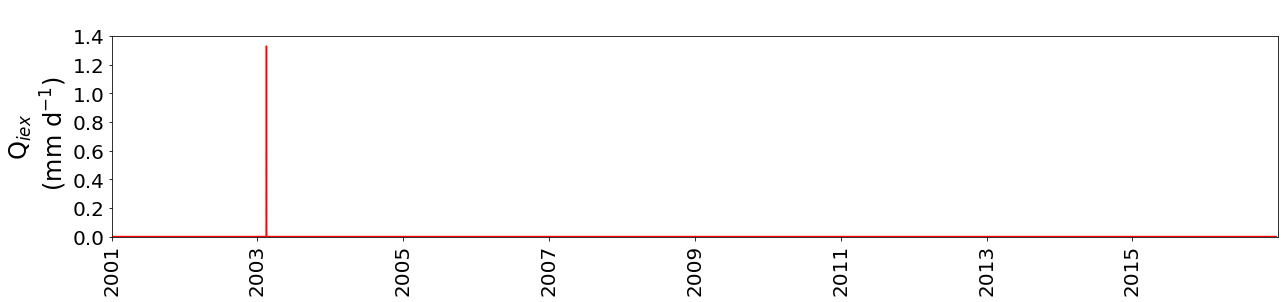

In [48]:
#SturtPlains
%run ../../src_py/plot_timeseries.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-ys 2001 -ye 2016 --colors red black --var "infx" --figsize 18 4 --hpad -2 --labelsize 24 \
--ymax 1.4 --ymin 0  --xloc_title -0.05 --yloc_title 1.10 --no_fig_lab

**Figure S6.40.** Infiltration excess runoff for  Sturt Plains. 